**CAPSTONE BANGKIT 2023**

**Cari Matang (Application Detecting Rotten Fruits)**


### Akses Google Drive



In [2]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: ignored

In [3]:
!sudo add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!sudo apt-get update -qq 2>&1 > /dev/null
!sudo apt -y install -qq google-drive-ocamlfuse 2>&1 > /dev/null
!google-drive-ocamlfuse



debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
/usr/bin/xdg-open: 869: www-browser: not found
/usr/bin/xdg-open: 869: links2: not found
/usr/bin/xdg-open: 869: elinks: not found
/usr/bin/xdg-open: 869: links: not found
/usr/bin/xdg-open: 869: lynx: not found
/usr/bin/xdg-open: 869: w3m: not found
xdg-open: no method available for opening 'https://accounts.google.com/o/oauth2/auth?client_id=564921029129.apps.googleusercontent.com&redirect_uri=https%3A%2F%2Fgd-ocaml-auth.appspot.com%2Foauth2callback&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&

In [4]:
!sudo apt-get install -qq w3m # to act as web browser 
!xdg-settings set default-web-browser w3m.desktop # to set default browser
%cd /content
!mkdir drive
%cd drive
!mkdir MyDrive
%cd ..
%cd ..
!google-drive-ocamlfuse /content/drive/MyDrive

debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package w3m.
(Reading database ... 122537 files and directories currently installed.)
Preparing to unpack .../w3m_0.5.3-37ubuntu0.1_amd64.deb ...
Unpacking w3m (0.5.3-37ubuntu0.1) ...
Setting up w3m (0.5.3-37ubuntu0.1) ...
Processing triggers for man-db (2.9.1-1) ...
Processing triggers for mime-support (3.64ubuntu1) ...
/content
/content/drive
/content
/
Access token retrieved correctly.


### Akses ke directory dataset


In [1]:
import os

 

base_dir = r'C:\Users\HP\anaconda3\envs\bangkit1\Capstone Bangkit\dataset\train'

freshapples_dir = os.path.join(base_dir, 'freshapples')
freshbanana_dir = os.path.join(base_dir, 'freshbanana')
freshoranges_dir = os.path.join(base_dir, 'freshoranges')
rottenapples_dir = os.path.join(base_dir, 'rottenapples')
rottenbanana_dir = os.path.join(base_dir, 'rottenbanana')
rottenoranges_dir = os.path.join(base_dir, 'rottenoranges')

print('total training fresh apples images :', len(os.listdir(freshapples_dir)))
print('total training fresh banana images :', len(os.listdir(freshbanana_dir)))
print('total training fresh oranges images:', len(os.listdir(freshoranges_dir)))
print('total training rotten apples images:', len(os.listdir(rottenapples_dir)))
print('total training rotten banana images:', len(os.listdir(rottenbanana_dir)))
print('total training rotten oranges images:', len(os.listdir(rottenoranges_dir)))

freshapples_files = os.listdir(freshapples_dir)
print(freshapples_files[:10])

freshbanana_files = os.listdir(freshbanana_dir)
print(freshbanana_files[:10])

freshoranges_files = os.listdir(freshoranges_dir)
print(freshoranges_files[:10])

rottenapples_files = os.listdir(rottenapples_dir)
print(rottenapples_files[:10])

rottenbanana_files = os.listdir(rottenbanana_dir)
print(rottenbanana_files[:10])

rottenoranges_files = os.listdir(rottenoranges_dir)
print(rottenoranges_files[:10])


total training fresh apples images : 1693
total training fresh banana images : 1581
total training fresh oranges images: 1466
total training rotten apples images: 2342
total training rotten banana images: 2224
total training rotten oranges images: 1595
['rotated_by_15_Screen Shot 2018-06-08 at 4.59.36 PM.png', 'rotated_by_15_Screen Shot 2018-06-08 at 4.59.44 PM.png', 'rotated_by_15_Screen Shot 2018-06-08 at 4.59.57 PM.png', 'rotated_by_15_Screen Shot 2018-06-08 at 5.00.03 PM.png', 'rotated_by_15_Screen Shot 2018-06-08 at 5.00.12 PM.png', 'rotated_by_15_Screen Shot 2018-06-08 at 5.00.18 PM.png', 'rotated_by_15_Screen Shot 2018-06-08 at 5.00.26 PM.png', 'rotated_by_15_Screen Shot 2018-06-08 at 5.00.50 PM.png', 'rotated_by_15_Screen Shot 2018-06-08 at 5.01.08 PM.png', 'rotated_by_15_Screen Shot 2018-06-08 at 5.01.15 PM.png']
['rotated_by_15_Screen Shot 2018-06-12 at 10.00.00 PM.png', 'rotated_by_15_Screen Shot 2018-06-12 at 10.00.21 PM.png', 'rotated_by_15_Screen Shot 2018-06-12 at 10.00.

### Menampilkan isi dataset

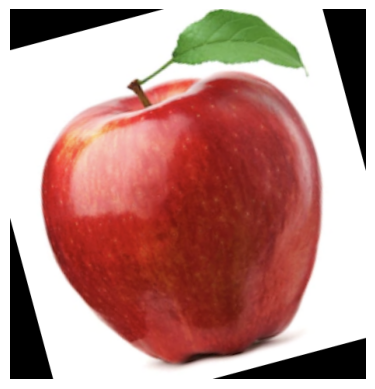

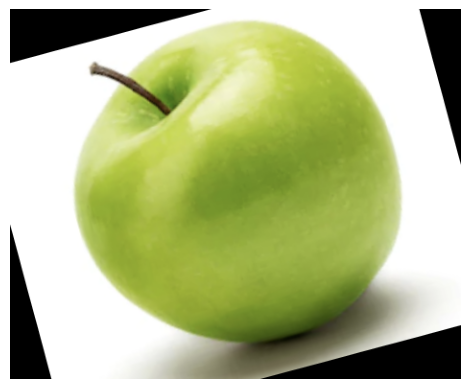

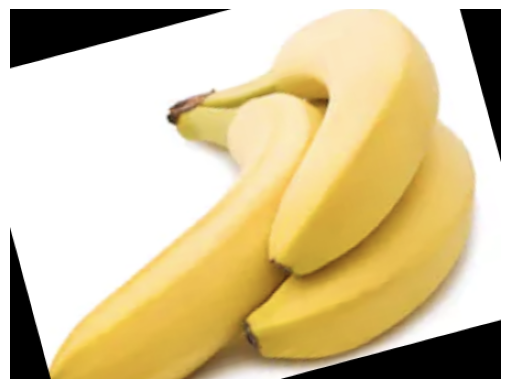

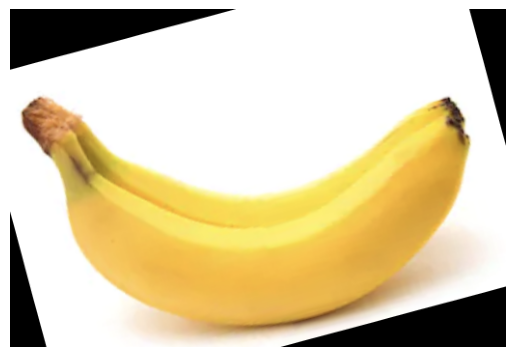

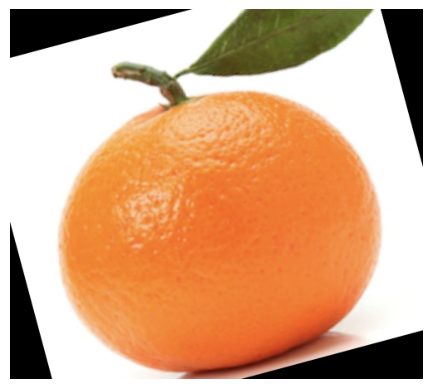

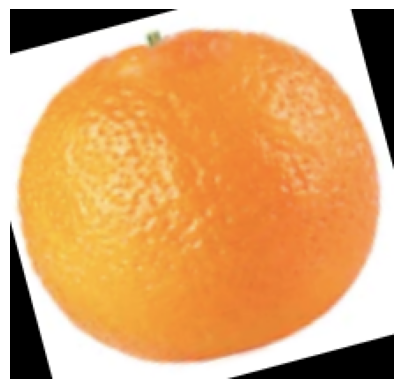

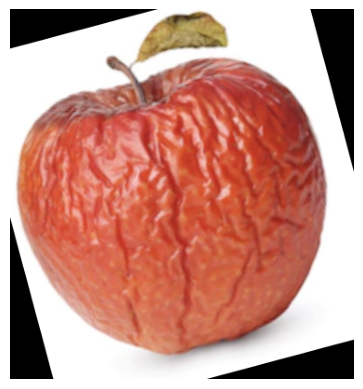

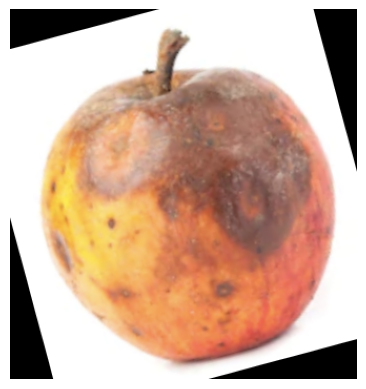

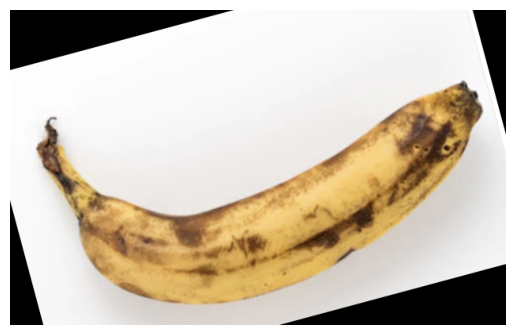

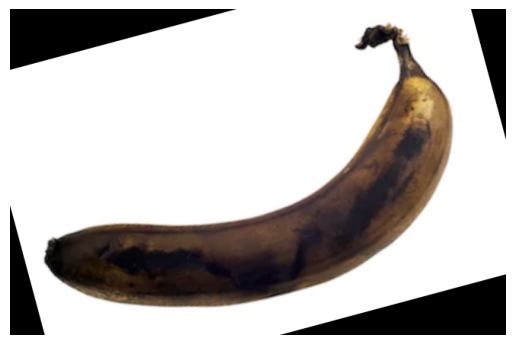

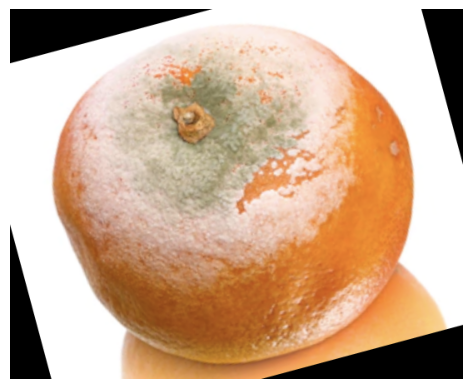

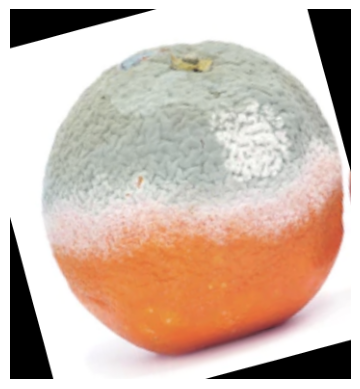

In [2]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

pic_index = 2

next_freshapples = [os.path.join(freshapples_dir, fname) 
                for fname in freshapples_files[pic_index-2:pic_index]]
next_freshbanana = [os.path.join(freshbanana_dir, fname) 
                for fname in freshbanana_files[pic_index-2:pic_index]]
next_freshoranges = [os.path.join(freshoranges_dir, fname) 
                for fname in freshoranges_files[pic_index-2:pic_index]]
next_rottenapples = [os.path.join(rottenapples_dir, fname) 
                for fname in rottenapples_files[pic_index-2:pic_index]]
next_rottenbanana = [os.path.join(rottenbanana_dir, fname) 
                for fname in rottenbanana_files[pic_index-2:pic_index]]
next_rottenoranges = [os.path.join(rottenoranges_dir, fname) 
                for fname in rottenoranges_files[pic_index-2:pic_index]]
                

for i, img_path in enumerate(next_freshapples+next_freshbanana+next_freshoranges+next_rottenapples+next_rottenbanana+next_rottenoranges):
  img = mpimg.imread(img_path)
  plt.imshow(img)
  plt.axis('Off')
  plt.show()

### Build the Model

In [3]:
import tensorflow as tf

model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(6, activation='softmax')
])

# Print the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

In [4]:
# Compile the model
model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

### Definisikan Callbacks

In [5]:
ACCURACY_THRESHOLD = 0.95
LOSS_THRESHOLD = 0.09

class myCallback(tf.keras.callbacks.Callback): 
    def on_epoch_end(self, epoch, logs={}): 
        if(logs.get('loss') < LOSS_THRESHOLD):   
            print("\nLoss is lower than 0.09 so stopping training!")
            self.model.stop_training = True
        
callbacks = myCallback()

### Prepare Image Data Generator Untuk Train Model


In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

TRAINING_DIR = r"C:\Users\HP\anaconda3\envs\bangkit1\Capstone Bangkit\dataset\train"
training_datagen = ImageDataGenerator(rescale = 1./255)

VALIDATION_DIR = r"C:\Users\HP\anaconda3\envs\bangkit1\Capstone Bangkit\dataset\test"
validation_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = training_datagen.flow_from_directory(
	TRAINING_DIR,
	target_size=(150,150),
	class_mode='categorical',
    batch_size=126,
    shuffle=True
)

validation_generator = validation_datagen.flow_from_directory(
	VALIDATION_DIR,
	target_size=(150,150),
	class_mode='categorical',
    batch_size=126,
    shuffle=True
)

Found 10901 images belonging to 6 classes.
Found 2698 images belonging to 6 classes.


In [7]:
train_generator.class_indices

{'freshapples': 0,
 'freshbanana': 1,
 'freshoranges': 2,
 'rottenapples': 3,
 'rottenbanana': 4,
 'rottenoranges': 5}

In [8]:
validation_generator.class_indices

{'freshapples': 0,
 'freshbanana': 1,
 'freshoranges': 2,
 'rottenapples': 3,
 'rottenbanana': 4,
 'rottenoranges': 5}

In [9]:
NUM_TRAIN_DATA = train_generator.n
NUM_VALID_DATA = validation_generator.n

# Train and Evaluate the model

In [10]:
# Train the model
history = model.fit(train_generator, epochs=25, steps_per_epoch=20, validation_data = validation_generator, verbose = 1, validation_steps=3, callbacks=[callbacks])

Epoch 1/25
20/20 [==============================] - 126s 6s/step - loss: 1.5079 - accuracy: 0.3746 - val_loss: 1.0330 - val_accuracy: 0.5899
Epoch 2/25
20/20 [==============================] - 103s 5s/step - loss: 0.8095 - accuracy: 0.7003 - val_loss: 0.5758 - val_accuracy: 0.7989
Epoch 3/25
20/20 [==============================] - 96s 5s/step - loss: 0.4954 - accuracy: 0.8353 - val_loss: 0.4614 - val_accuracy: 0.8360
Epoch 4/25
20/20 [==============================] - 80s 4s/step - loss: 0.4471 - accuracy: 0.8464 - val_loss: 0.4047 - val_accuracy: 0.8677
Epoch 5/25
20/20 [==============================] - 65s 3s/step - loss: 0.3763 - accuracy: 0.8711 - val_loss: 0.3318 - val_accuracy: 0.8889
Epoch 6/25
20/20 [==============================] - 64s 3s/step - loss: 0.3336 - accuracy: 0.8825 - val_loss: 0.2504 - val_accuracy: 0.9180
Epoch 7/25
20/20 [==============================] - 69s 3s/step - loss: 0.2721 - accuracy: 0.9000 - val_loss: 0.2218 - val_accuracy: 0.9259
Epoch 8/25
20/20 [

In [16]:
score = model.evaluate(train_generator)

print('Loss: {:.4f}'.format(score[0]))
print('Accuracy: {:.4f}'.format(score[1]))

87/87 [==============================] - 82s 934ms/step - loss: 0.0617 - accuracy: 0.9803
Loss: 0.0617
Accuracy: 0.9803


In [17]:
score = model.evaluate(validation_generator)

print('Loss: {:.4f}'.format(score[0]))
print('Accuracy: {:.4f}'.format(score[1]))

22/22 [==============================] - 18s 829ms/step - loss: 0.0965 - accuracy: 0.9648
Loss: 0.0965
Accuracy: 0.9648


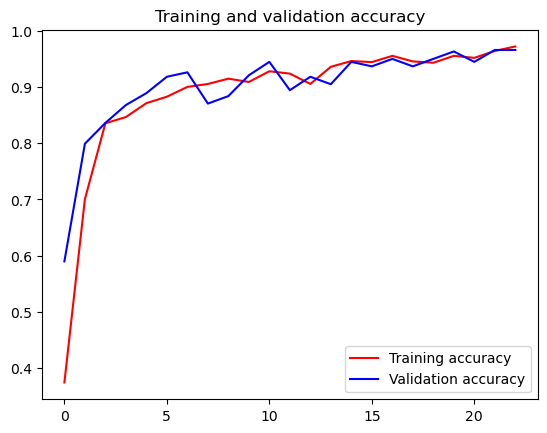

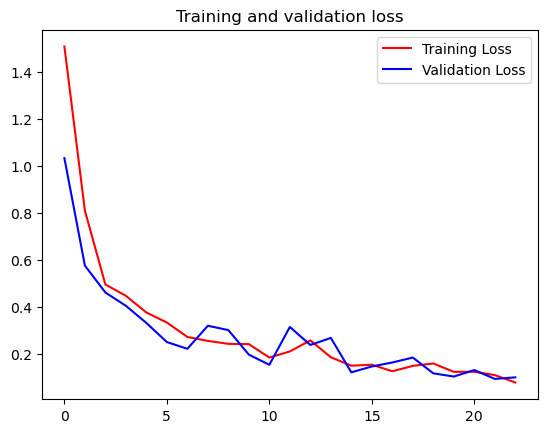

<Figure size 640x480 with 0 Axes>

In [13]:
import matplotlib.pyplot as plt

# Plot the results
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.figure()

plt.show()

In [14]:
BATCH_SIZE = 126


In [15]:
from sklearn.metrics import classification_report, confusion_matrix
import sklearn.metrics
import numpy as np

Y_pred = model.predict(validation_generator, NUM_VALID_DATA // BATCH_SIZE+1)
y_pred = np.argmax(Y_pred, axis=1)

print('Confusion Matrix')
print(confusion_matrix(validation_generator.classes, y_pred))
confusion_array = sklearn.metrics.confusion_matrix(validation_generator.classes, y_pred)

print('True Negative = ', confusion_array[0,0])
print('False Negative = ', confusion_array[1,0])
print('True Positive = ', confusion_array[1,1])
print('False Positive = ', confusion_array[0,1])

22/22 [==============================] - 19s 870ms/step
Confusion Matrix
[[ 67  48  54  79  82  65]
 [ 72  52  53  80  71  53]
 [ 70  50  50  97  69  52]
 [102  98  98 112 113  78]
 [ 72  76  83 122 106  71]
 [ 53  54  56  93  88  59]]
True Negative =  67
False Negative =  72
True Positive =  52
False Positive =  48


### Classification Report


In [31]:
print('Classification Report')
target_names = ['freshapples', 'freshbanana', 'freshoranges','rottenapples','rottenbanana','rottenoranges']
print(classification_report(validation_generator.classes, y_pred, target_names=target_names))

Classification Report
               precision    recall  f1-score   support

  freshapples       0.15      0.15      0.15       395
  freshbanana       0.16      0.16      0.16       381
 freshoranges       0.17      0.17      0.17       388
 rottenapples       0.22      0.22      0.22       601
 rottenbanana       0.19      0.19      0.19       530
rottenoranges       0.14      0.14      0.14       403

     accuracy                           0.18      2698
    macro avg       0.17      0.17      0.17      2698
 weighted avg       0.18      0.18      0.18      2698



### Tes Model Pakai Gambar


In [27]:
## NOTE: If you are using Safari and this cell throws an error,
## please skip this block and run the next one instead.

import numpy as np
#from google.colab import files
from tensorflow.keras.utils import load_img, img_to_array

#uploaded = files.upload()
test_path = r"C:\Users\HP\anaconda3\envs\bangkit1\Capstone Bangkit\tes gambar"

for fn in test_path:
 
  # predicting images
  path = fn
  img = load(path, target_size=(150, 150))
  x = img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(fn)
  print(classes)

TypeError: 'target_size' is an invalid keyword argument for open()

### Convert model ke H5

In [21]:
from tensorflow import keras
model.save(r'C:\Users\HP\anaconda3\envs\bangkit1\Capstone Bangkit\Model\model2_wisnu.h5')